Aditya Nugraha | JCVLDS-05-27

# Data Understanding

## Context
Tim HR atau Human Resource dari sebuah perusahaan e-commerce terkenal yang beroperasi di wilayah Amerika dan Eropa ingin mengetahui gambaran umum tentang kepegawaian di tempat perusahaannya bekerja. Terdapat sebuah database yang berisi detail karyawan berserta status kepegawaiannya. dari database tersebut, Tim HR ingin bisa mendapatkan gambaran bagaimana kondisi dari perusahaannya bekerja seperti banyaknya karyawan di setiap cabang, besaran dan kesesuaian gaji karyawan di setiap posisinya. 

diharapkan dari hasil analisis ini dapat membantu menjawab pertanyaan-pertanyaan seperti apakah ada karyawan yang gajinya terlalu tinggi atau terlalu rendah dibanding karyawan lain di posisi yang sama, apakah pada cabang tertentu ada terlalu banyak karyawan, dan lain sebagainya. keputusan ini yang nantinya dapat digunakan untuk membantu tim HR untuk membuat keputusan strategis kedepannya terutama jika data hasil analisis ini digabungkan dengan data analisis lain yang dapat dihubungkan. keputusan bisnis yang diambil bisa berupa penundaan atau percepatan kenaikan gaji, pemindahan karyawan ke cabang lain, perekrutan karyawan, dan sebagainya.

## Database Information
Sumber Database: https://drive.google.com/file/d/1XfhOHYKzW7Cz1RNHlknJI6Lz7LLSi5EI/view?usp=sharing

Database tersebut memiliki 7 tabel, yaitu:
- employees: Berisi data karyawan yang ada
- jobs: Berisi posisi pekerjaan beserta standar gaji minimal dan maximal yang telah ditetapkan pada masing-masing posisi
- job_history: Berisi tanggal keluar-masuk karyawan beserta jabatannya
- departments: Berisi detail departemen
- locations: berisi detail lokasi dari departemen
- countries: berisi detail negara dari lokasi departemen
- regions: berisi detail wilayah dari lokasi departemen

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.  

Lalu berikut merupakan rancangan ERD dari database yang telah di sebutkan sebelumnya:

![HR ERD](Datasets/HR/HR%20ERD.gif)

### Import Module / Library

In [68]:
import pandas as pd
import numpy as np
import mysql.connector as sqlcon

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Database

### Initialization Database Connection
Bagian ini akan membuat koneksi ke database yang akan digunakan yang dalam analisis ini adalah database bernama ``human_resource``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database, lalu menyimpannya ke dalam bentuk *DataFrame*

In [69]:
# Making Connection to Target Database 'human_resource'
db = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'root',
    database = 'human_resource')

In [70]:
# Query Function and Convert to DataFrame
curs = db.cursor()
def q(query) :
    curs.execute (query)
    result = curs.fetchall()
    table = pd.DataFrame(result, columns=curs.column_names)
    return table

## Querying Database

### Raw Data
Bagian pertama ini merupakan pengambilan data mentah dari seluruh tabel yang di dasari berdasarkan data-data dari tabel kiri atau biasa disebut ``Left Join`` dengan tabel *Left*-nya adalah ``employees``. Masing-masing dari setiap tabel tersebut diambil semua kolomnya kecuali jika terdapat kolom yang sama. Informasi-informasi yang diambil akan di olah kembali menggunakan fungsi pandas dengan kolom yang diambil disesuaikan dengan yang dibutuhkan nanti. Informasi yang diambil antara lain:  
- **employees:** employee_id, first_name, last_name, email, phone_number, hire_date, salary, commission_pct, job_id, department_id, manager_id
- **jobs:** job_title, min_salary, max_salary
- **job_history:** start_date, end_date
- **departments:** department_name, location_id
- **locations:** street_address, postal_code, city, state_province, country_id
- **countries:** country_name, region_id
- **regions:** region_name

In [71]:
raw_data = q('''
SELECT employees.employee_id, first_name, last_name, email,
		phone_number, hire_date, salary, commission_pct, 
        employees.job_id, start_date, end_date, job_title,
        min_salary, max_salary, employees.department_id,
        department_name, employees.manager_id, departments.location_id
        street_address, postal_code, city, state_province, 
        locations.country_id, country_name, countries.region_id,
        region_name
FROM employees
LEFT JOIN departments
	ON employees.department_id = departments.department_id
LEFT JOIN job_history
	ON employees.employee_id = job_history.employee_id
LEFT JOIN jobs
	ON employees.job_id = jobs.job_id
LEFT JOIN locations
	ON departments.location_id = locations.location_id
LEFT JOIN countries
	ON locations.country_id = countries.country_id
LEFT JOIN regions
	ON countries.region_id = regions.region_id;
''')
pd.set_option('display.max_columns', None) # mentiadakan jumlah kolom yang ditampilkan
raw_data.sample(5)


,employee_id,first_name,last_name,email,phone_number,hire_date,salary,commission_pct,job_id,start_date,end_date,job_title,min_salary,max_salary,department_id,department_name,manager_id,street_address,postal_code,city,state_province,country_id,country_name,region_id,region_name
13,112,Jose Manuel,Urman,JMURMAN,515.124.4469,1987-06-29,7800.00,0.00,FI_ACCOUNT,None,None,Accountant,4200,9000,100,Finance,108,1700,98199,Seattle,Washington,US,United States of America,2,Americas\r
24,123,Shanta,Vollman,SVOLLMAN,650.123.4234,1987-07-10,6500.00,0.00,ST_MAN,None,None,Stock Manager,5500,8500,50,Shipping,100,1500,99236,South San Francisco,California,US,United States of America,2,Americas\r
84,182,Martha,Sullivan,MSULLIVA,650.507.9878,1987-09-07,2500.00,0.00,SH_CLERK,None,None,Shipping Clerk,2500,5500,50,Shipping,120,1500,99236,South San Francisco,California,US,United States of America,2,Americas\r
92,190,Timothy,Gates,TGATES,650.505.3876,1987-09-15,2900.00,0.00,SH_CLERK,None,None,Shipping Clerk,2500,5500,50,Shipping,122,1500,99236,South San Francisco,California,US,United States of America,2,Americas\r
31,130,Mozhe,Atkinson,MATKINSO,650.124.6234,1987-07-17,2800.00,0.00,ST_CLERK,None,None,Stock Clerk,2000,5000,50,Shipping,121,1500,99236,South San Francisco,California,US,United States of America,2,Americas\r


In [72]:
raw_data.shape

(110, 25)

### Job Grades
Bagian ini menentukan tingkatan antara jabatan berdasarkan nilai gaji yang dibayarkannya. Job grading disini menggunakan metode ranking berdasarkan range gaji pekerjaan yang ditetapkan, dan range gaji dari karyawan yang ada. semakin tinggi gajinya, maka semakin tinggi juga job gradenya. Berikut merupakan fitur dan keterangan dari tabel ini:


|Fitur     |Keterangan|
|----------|----------|
|job_id|id jabatan|
|job_title|nama jabatan|
|min_salary|gaji minimal yang telah ditetapkan pekerjaan tersebut|
|max_salary|gaji maksimal yang telah ditetapkan pekerjaan tersebut|
|avg_salary|rata-rata gaji berdasarkan min_salary dan max_salary|
|grade_level|tinggakatan jabatan berdasarkan avg_salary|
|current_min_salary|gaji minimal pada karyawan saat ini|
|current_max_salary|gaji maksimal pada karyawan saat ini|
|current_avg_salary|rata-rata gaji berdasarkan current_min_salary dan current_max_salary|
|salary_count|banyaknya karyawan pada masing-masing jabatan|
|grade_level_by_current|tinggakatan jabatan berdasarkan current_avg_salary|

pada kueri ini saya menggunakan `CTE` bernama job_grades dengan beberapa `Window Function` baik `aggregate` seperti `MAX`, `MIN`, `AVG`, dan `non-aggregate` seperti `DENSE_RANK`, `ROW_NUMBER` lengkap dengan fungsi `OVER` dan `PARTITION`

In [73]:
job_grades = q(
'''
WITH job_grades AS(
	SELECT employees.job_id, jobs.job_title, jobs.min_salary, jobs.max_salary, (min_salary+max_salary)/2 avg_salary,MIN(salary) OVER(PARTITION BY job_id) current_min_salary, 
			MAX(salary) OVER(PARTITION BY job_id) current_max_salary, AVG(salary) OVER(PARTITION BY job_id) current_avg_salary, 
            COUNT(salary) OVER(PARTITION BY job_id) salary_count
	FROM employees
    LEFT JOIN jobs
		ON employees.job_id = jobs.job_id
)

SELECT job_id, job_title, min_salary, max_salary, avg_salary, 
		DENSE_RANK() OVER(ORDER BY avg_salary) grade_level, 
		current_min_salary, current_max_salary, current_avg_salary, salary_count, 
		DENSE_RANK() OVER(ORDER BY current_avg_salary) grade_level_by_current
FROM(SELECT *, ROW_NUMBER() OVER(PARTITION BY job_title) duplicate 
FROM job_grades) t0
WHERE duplicate=1
ORDER BY (avg_salary+current_avg_salary)/2 DESC;
'''
)
job_grades

,job_id,job_title,min_salary,max_salary,avg_salary,grade_level,current_min_salary,current_max_salary,current_avg_salary,salary_count,grade_level_by_current
0,AD_PRES,President,20000,40000,30000.0000,14,24000.00,24000.00,24000.000000,1,18
1,AD_VP,Administration Vice President,15000,30000,22500.0000,13,17000.00,17000.00,17000.000000,2,17
2,SA_MAN,Sales Manager,10000,20000,15000.0000,12,10500.00,14000.00,12200.000000,5,15
3,MK_MAN,Marketing Manager,9000,15000,12000.0000,10,13000.00,13000.00,13000.000000,1,16
4,AC_MGR,Accounting Manager,8200,16000,12100.0000,11,12000.00,12000.00,12000.000000,1,14
5,FI_MGR,Finance Manager,8200,16000,12100.0000,11,12000.00,12000.00,12000.000000,1,14
6,PU_MAN,Purchasing Manager,8000,15000,11500.0000,9,11000.00,11000.00,11000.000000,1,13
7,PR_REP,Public Relations Representative,4500,10500,7500.0000,7,10000.00,10000.00,10000.000000,1,12
8,SA_REP,Sales Representative,6000,12000,9000.0000,8,6100.00,11500.00,8350.000000,30,11
9,AC_ACCOUNT,Public Accountant,4200,9000,6600.0000,5,8300.00,8300.00,8300.000000,1,10


In [42]:
job_grades.shape

(19, 11)

# Data Manipulation

Sepertinya yang dijelaskan sebelumnya `raw_data` merupakan data mentah yang nantinya akan secara mandiri diambil fitur/kolom yang diperlukan saja pada proses visualisasi dan statistik. namun sebelum melakukan hal tersebut, harus dilakukan pengecekan informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga ketika fitur tersebut dipanggil maka diharapkan data tersebut sudah bersih dan siap di analisis lebih lanjut. tabel `job_grades` juga akan dilakukan proses manipulasi di sini.

## Raw Data

### Data Anomalies

In [74]:
listItem = []
for col in raw_data.columns :
    listItem.append([col, raw_data[col].dtype, len(raw_data),raw_data[col].isna().sum(), round((raw_data[col].isna().sum()/len(raw_data[col])) * 100,2),
                    raw_data[col].nunique(), list(raw_data[col].drop_duplicates().sample(2).values)])

tableInfo = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tableInfo

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,employee_id,object,110,0,0.00,107,"[177, 116]"
1,first_name,object,110,0,0.00,91,"[TJ, Oliver]"
2,last_name,object,110,0,0.00,102,"[Hall, Fleaur]"
3,email,object,110,0,0.00,107,"[HBAER, AERRAZUR]"
4,phone_number,object,110,0,0.00,107,"[650.124.1334, 603.123.6666]"
5,hire_date,object,110,0,0.00,107,"[1987-08-07, 1987-09-13]"
6,salary,object,110,0,0.00,57,"[13500.00, 2600.00]"
7,commission_pct,object,110,0,0.00,8,"[0.35, 0.10]"
8,job_id,object,110,0,0.00,19,"[SA_REP, PU_MAN]"
9,start_date,object,110,100,90.91,8,"[1998-03-24, 1993-01-13]"


Ditemukan terdapat beberapa fitur yang memiliki tipe data yang salah, maka akan kita ubah menjadi tipe data yang benar.  
Masing-masing fitur yang memiliki tipe data salah yaitu:  
- `hire_date`, `start_date`, `end_date` yang awalnya bertipe data `object` akan kita ubah menjadi tipe data `datetime`
- `salary`, `commission_pct`, `min_salary`, `max_salary` yang awalnya bertipe data `object` akan kita ubah menjadi tipe data `numeric`

In [75]:
raw_data[['hire_date', 'start_date', 'end_date']] = raw_data[['hire_date', 'start_date', 'end_date']].apply(pd.to_datetime)
raw_data[['salary', 'commission_pct', 'min_salary', 'max_salary']] = raw_data[['salary', 'commission_pct', 'min_salary', 'max_salary']].apply(pd.to_numeric)

print(raw_data[['hire_date', 'start_date', 'end_date']].dtypes)
print(raw_data[['salary', 'commission_pct', 'min_salary', 'max_salary']].dtypes)

hire_date     datetime64[ns]
start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object
salary            float64
commission_pct    float64
min_salary        float64
max_salary        float64
dtype: object


### Missing Values

In [76]:
raw_data.isnull().sum()[raw_data.isnull().sum() > 0]

start_date         100
end_date           100
department_name      1
street_address       1
postal_code          1
city                 1
state_province       1
country_id           1
country_name        36
region_id           36
region_name         36
dtype: int64

Di ketahui terdapat 11 fitur yang memiliki missing value, semua fitur yang memiliki missing value akan di isi berdasarkan data fakta yang telah tersedia baik di dalam database ataupun data dari luar (mis: wikipedia). tetapi untuk fitur `start_date` dan `end_date` tidak akan di isi, karena merupakan data mutlak yang harus berisikan data yang sebenarnya.

In [77]:
raw_data[raw_data['department_name'].isnull()]

,employee_id,first_name,last_name,email,phone_number,hire_date,salary,commission_pct,job_id,start_date,end_date,job_title,min_salary,max_salary,department_id,department_name,manager_id,street_address,postal_code,city,state_province,country_id,country_name,region_id,region_name
80,178,Kimberely,Grant,KGRANT,011.44.1644.429263,1987-09-03,7000.0,0.15,SA_REP,NaT,NaT,Sales Representative,6000.0,12000.0,0,None,149,None,None,None,None,None,None,None,None


Terlihat pada tabel diatas bahwa ternyata missing value pada fitur `department_name`, `street_address`, `postal_code`, `city`, `state_province`, dan `country_id` berada pada baris yang sama, dan juga ditemukan terdapat anomali pada `department_id` di baris ini. selanjutnya kita akan mencari data tersebut berdasarkan fitur lain yaitu yang saya gunakan adalah fitur `job_id` karena diasumsikan setiap pekerjaan berada pada departemen yang sama, maka akan kita cek dulu kebenarannya.

In [78]:
raw_data[raw_data['job_id'] == 'SA_REP'][raw_data.columns[14:-1]].drop('manager_id', axis=1).drop_duplicates()

,department_id,department_name,street_address,postal_code,city,state_province,country_id,country_name,region_id
51,80,Sales,2500,The Oxford,OX9 9ZB,Oxford,Ox,None,None
80,0,None,None,None,None,None,None,None,None


Terlihat bahwa benar, dengan `job_id` adalah *SA_REP* sesuai dengan baris yang memiliki missing value sebelumnya hanya terdapat 2 data unik. Karena asumsi kita benar, maka akan dilakukan pembaruan data yang missing tadi dengan data yang kita temukan saling berkaitan.

In [79]:
x = raw_data.columns[14:-1].drop('manager_id')
raw_data.loc[80, x] = raw_data.loc[51, x]
raw_data.loc[80, x]

department_id                80
department_name           Sales
street_address             2500
postal_code         The Oxford 
city                    OX9 9ZB
state_province           Oxford
country_id                   Ox
country_name               None
region_id                  None
Name: 80, dtype: object

Selanjutnya, di ketahui terdapat 36 missing value pada fitur `country_name`, `region_id`, `region_name`, maka pertama kita mencari dulu data apakah yang kosong itu.

In [80]:
raw_data[['department_name', 'city', 'state_province', 'country_id', 
          'country_name', 'region_id', 'region_name']].drop_duplicates()

,department_name,city,state_province,country_id,country_name,region_id,region_name
0,Executive,Seattle,Washington,US,United States of America,2,Americas\r
4,IT,Southlake,Texas,US,United States of America,2,Americas\r
9,Finance,Seattle,Washington,US,United States of America,2,Americas\r
15,Purchasing,Seattle,Washington,US,United States of America,2,Americas\r
21,Shipping,South San Francisco,California,US,United States of America,2,Americas\r
46,Sales,OX9 9ZB,Oxford,Ox,None,None,None
102,Administration,Seattle,Washington,US,United States of America,2,Americas\r
104,Marketing,Toronto,Ontario,CA,Canada,2,Americas\r
106,Human Resources,London,,UK,United Kingdom,1,Europe\r
107,Public Relations,Munich,Bavaria,DE,Germany,1,Europe\r


Dengan tabel yang kita jabarkan diatas, ditemukan bahwa terdapat 2 baris data unik yang tidak mempunyai isi, di asumsikan dari 36 data yang memiliki missing value hanya berasal dari 2 baris data unik yang telah kita temukan. Selanjutnya kita mencari data tersebut dengan mencarinya di `wikipedia` dan ditemukan bahwa *UK tidak memiliki state/lander seperti yang ada pada negara USA dan Jerman*  
Maka di asumsikan juga bahwa data yang akan kita masukan sebagai berikut:
- city: OX9 9ZB, state_province: Oxford, country_name: United Kingdom, region_id: 1, region_name: Europe  
- city: London, state_province: London, country_name: United Kingdom, region_id: 1, region_name: Europe  

In [81]:
a = raw_data[raw_data['city'] == 'OX9 9ZB'].index.tolist()
b = raw_data[raw_data['city'] == 'London'].index.tolist()
raw_data.loc[a, ['country_name', 'region_id', 'region_name']] = ['United Kingdom', '1', 'Europe\r']
raw_data.loc[b, ['state_province']] = ['London']

### Duplicated Data

In [82]:
raw_data.duplicated().sum()

0

Data pada tabel `raw_data` tidak memiliki duplikasi data

## Job Grades

### Data Anomalies

In [83]:
job_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   job_id                  19 non-null     object
 1   job_title               19 non-null     object
 2   min_salary              19 non-null     object
 3   max_salary              19 non-null     object
 4   avg_salary              19 non-null     object
 5   grade_level             19 non-null     int64 
 6   current_min_salary      19 non-null     object
 7   current_max_salary      19 non-null     object
 8   current_avg_salary      19 non-null     object
 9   salary_count            19 non-null     int64 
 10  grade_level_by_current  19 non-null     int64 
dtypes: int64(3), object(8)
memory usage: 1.8+ KB


Ditemukan terdapat beberapa fitur yang memiliki tipe data yang salah, maka akan kita ubah menjadi tipe data yang benar.  
Masing-masing fitur yang memiliki tipe data salah yaitu:  
- `min_salary`, `min_salary`, `max_salary`, `avg_salary`, `current_min_salary`, `current_max_salary`, `current_avg_salary` yang awalnya bertipe data `object` akan kita ubah menjadi tipe data `numeric`

In [84]:
job_grades[['min_salary', 'max_salary', 'avg_salary', 'current_min_salary', 'current_max_salary', 'current_avg_salary']] = job_grades[[
    'min_salary', 'max_salary', 'avg_salary', 'current_min_salary', 'current_max_salary', 'current_avg_salary']].apply(pd.to_numeric)

print(job_grades[['min_salary', 'max_salary', 'avg_salary',
      'current_min_salary', 'current_max_salary', 'current_avg_salary']].dtypes)

min_salary            float64
max_salary            float64
avg_salary            float64
current_min_salary    float64
current_max_salary    float64
current_avg_salary    float64
dtype: object


### Missing Values

In [85]:
job_grades.isnull().sum()[job_grades.isnull().sum() > 0]

Series([], dtype: int64)

Data pada tabel `job_grades` tidak memiliki missing values

### Duplicated Data

In [86]:
job_grades.duplicated().sum()

0

Data pada tabel `job_grades` tidak memiliki duplikasi data

## Data Kontak Karyawan

In [87]:
employees_contact = raw_data[['employee_id', 'first_name', 'last_name', 'email', 'phone_number', 'job_title',
                              'department_name']].rename(columns={'job_title': 'position', 'department_name': 'department'}).drop_duplicates()
employees_contact.sample(5)

,employee_id,first_name,last_name,email,phone_number,position,department
69,168,Lisa,Ozer,LOZER,011.44.1343.929268,Sales Representative,Sales
17,116,Shelli,Baida,SBAIDA,515.127.4563,Purchasing Clerk,Purchasing
39,138,Stephen,Stiles,SSTILES,650.121.2034,Stock Clerk,Shipping
37,136,Hazel,Philtanker,HPHILTAN,650.127.1634,Stock Clerk,Shipping
15,114,Den,Raphaely,DRAPHEAL,515.127.4561,Purchasing Manager,Purchasing


In [88]:
employees_contact.shape # 107/110: berarti ada 3 data yang terduplikasi dan telah dihilangkan

(107, 7)

In [89]:
employees_contact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 109
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   employee_id   107 non-null    object
 1   first_name    107 non-null    object
 2   last_name     107 non-null    object
 3   email         107 non-null    object
 4   phone_number  107 non-null    object
 5   position      107 non-null    object
 6   department    107 non-null    object
dtypes: object(7)
memory usage: 6.7+ KB


Pada tabel `employees_contact` yang telah kita buat tidak ditemukan `Missing Values` maupun `Duplikasi Data`

# Data Visualization & Statistics

## Outlier

Bagian ini kita akan mencari nilai outlier pada tabel `raw_data` berdasarkan gaji pada setiap karyawan.  
Pertama, kita akan mencari gambaran persebaran data dari gaji menggunakan histogram dan boxplot.

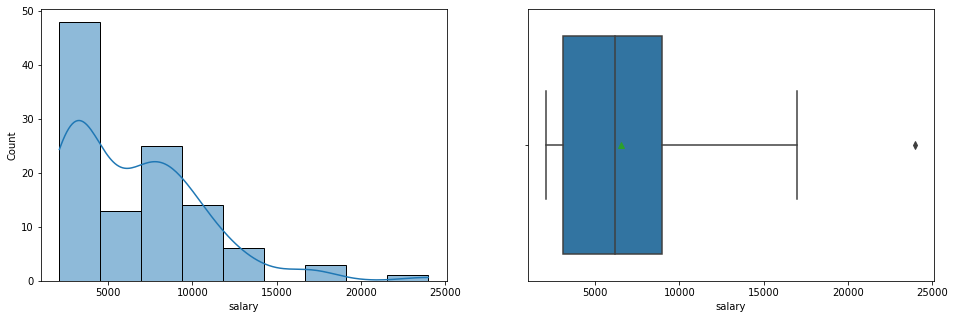

In [122]:
# Plot the distribution plot for the features and Form a Box-plot for the skewed feature
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(raw_data['salary'], kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=raw_data, x='salary', showmeans=True)
plt.show()


Sekilas, terlihat bahwa persebaran berfokus ke kiri dan nilai median yang sedikit ke kanan yang berarti data pada fitur `salary` bisa dibilang sebagai `Negatif Skew/Left Skewed`.  
Selanjutnya, kita akan mencari nilai quartile lalu melakukan perhitungan berdasarkan rumus berikut:
- Normal Distribution: (Q3 - Q2) = (Q2 - Q1)
- Positive Skew: (Q3 - Q2) > (Q2 - Q1)
- Negative Skew: (Q3 - Q2) < (Q2 - Q1)

In [107]:
# Finding the IQR
Q1 = raw_data['salary'].quantile(.25)
Q2 = raw_data['salary'].quantile(.5)
Q3 = raw_data['salary'].quantile(.75)
iqr = Q3 - Q1

print('Q1:', Q1)
print('Q2:', Q2)
print('Q3:', Q3)
print('IQR:', iqr)


Q1: 3100.0
Q2: 6200.0
Q3: 8950.0
IQR: 5850.0


In [108]:
if (Q3 - Q2) == (Q2 - Q1):
    print('Normal Distribution')
elif (Q3 - Q2) > (Q2 - Q1):
    print('Positive Skew')
else:
    print('Negative Skew')

Negative Skew


Terbukti bahwa data pada fitur `salary` tidak berdistribusi normal dan memiliki kemiringan negatif

Selanjutnya, untuk mencari outlier diperlukan batas atas dan batas bawah untuk menentukan apakah suatu data termasuk kedalam outlier atau tidak.  
Rumus perhitungan batas atas dan batas bawah, yaitu:
- Batas Atas: Q3 + (1.5 * IQR)
- Batas Bawah: Q1 - (1.5 * IQR)

In [92]:
# Finding upper and lower limit
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

print('Upper Limit:', upper_limit)
print('Lower Limit', lower_limit)


Upper Limit: 17725.0
Lower Limit -5675.0


Diketahui batas atas adalah `17725.0` dan batas bawahnya adalah `-5675.0`  
Selanjutnya kita akan mencari apakah ada data yang memenuhi kriteria dari outlier tersebut

In [102]:
# Finding Outliers
raw_data[(raw_data['salary'] > upper_limit) | (raw_data['salary'] < lower_limit)]

,employee_id,first_name,last_name,email,phone_number,hire_date,salary,commission_pct,job_id,start_date,end_date,job_title,min_salary,max_salary,department_id,department_name,manager_id,street_address,postal_code,city,state_province,country_id,country_name,region_id,region_name
0,100,Steven,King,SKING,515.123.4567,1987-06-17,24000.0,0.0,AD_PRES,NaT,NaT,President,20000.0,40000.0,90,Executive,0,1700,98199,Seattle,Washington,US,United States of America,2,Americas\r


Ditemukan bahwa terdapat 1 data yang memiliki nilai gaji yang dianggap outlier, Outlier sendiri merupakan data yang pantang untuk di hapus karena merupakan bagian dari keseluruhan data yang diperlukan untuk proses analisis data, maka untuk saat ini karena tujuan penelitian ini hanya untuk analisi maka tidak kita melakukan penanganan.

## Banyaknya Karyawan Berdasarkan Jabatan

terdapat 19 posisi yang ada pada perusahaan ini dengan masing-masing jumlah karyawannya, yaitu:


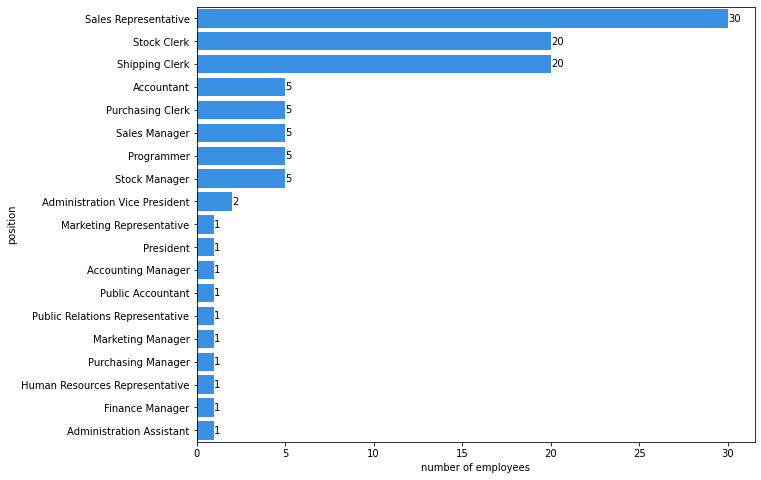

In [71]:
# Mencari banyaknya jabatan beserta banyaknya karyawan pada posisi tersebut.
print('terdapat', employees_contact[['position']].value_counts().count(),
      'posisi yang ada pada perusahaan ini dengan masing-masing jumlah karyawannya, yaitu:')
position = employees_contact[['position']].value_counts().reset_index().rename(
    columns={0: 'number of employees'})

plt.figure(figsize=(10, 8))
ax = sns.barplot(data=position, y='position', x='number of employees', color='dodgerblue')
ax.bar_label(ax.containers[0])
plt.show()

## Banyaknya Karyawan Berdasarkan Departemen

terdapat 11 department yang ada pada perusahaan ini dengan masing-masing jumlah karyawannya, yaitu:


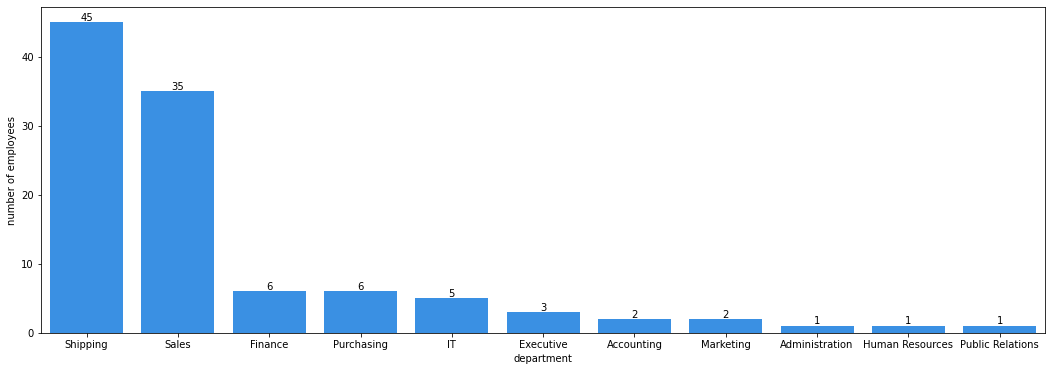

In [72]:
# Mencari banyaknya department beserta banyaknya karyawan pada department tersebut.
print('terdapat', employees_contact[['department']].value_counts().count(),
      'department yang ada pada perusahaan ini dengan masing-masing jumlah karyawannya, yaitu:')
dept = employees_contact[['department']].value_counts(
).reset_index().rename(columns={0: 'number of employees'})

plt.figure(figsize=(18, 6))
ax = sns.barplot(data=dept, x='department', y='number of employees', color='dodgerblue')
ax.bar_label(ax.containers[0])
plt.show()


## Banyaknya Karyawan Berdasarkan Lokasi Kota Departemennya

terdapat 7 lokasi kota yang ditempati departemennya dengan masing-masing jumlah karyawannya, yaitu:


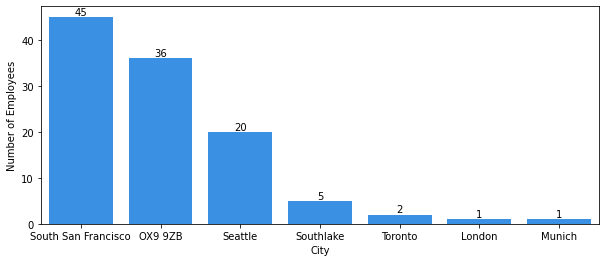

In [141]:
city = raw_data[['city']].value_counts(
).reset_index().rename(columns={0: 'number of employees'})
print('terdapat', city[['city']].value_counts().count(),
      'kota yang ditempati departemennya dengan masing-masing jumlah karyawannya, yaitu:')
plt.figure(figsize=(10, 4))
# plt.subplot(1, 2, 1)
ax = sns.barplot(data=city, x='city', y='number of employees', color='dodgerblue')
ax.bar_label(ax.containers[0])
plt.xlabel('City')
plt.ylabel('Number of Employees')
plt.show()

## Perbandingan Besaran Gaji Karyawan Berdasarkan Jabatan

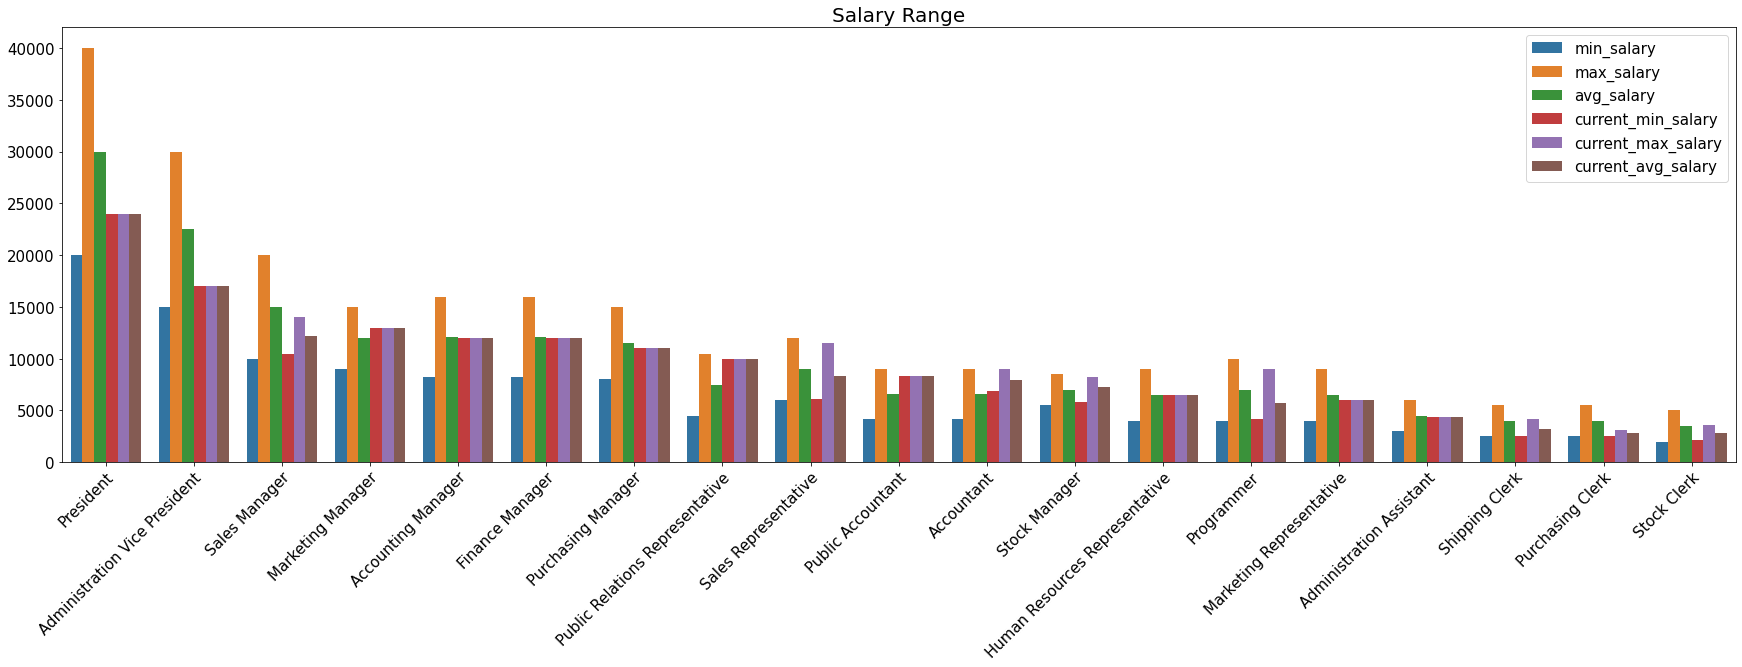

In [73]:
tidy = pd.melt(job_grades, id_vars=['job_title'], value_vars=[
               'min_salary', 'max_salary', 'avg_salary', 'current_min_salary', 'current_max_salary', 'current_avg_salary'])

plt.figure(figsize=(30, 8))
sns.barplot(data=tidy, x='job_title', y='value', hue='variable')
plt.title('Salary Range', size=20)
plt.xlabel(None)
plt.ylabel(None)
plt.yticks(size=15)
plt.xticks(size=15, rotation=45, ha='right', rotation_mode='anchor')
plt.legend(loc=0, fontsize=15)
plt.show()


Terlihat bahwa sepertinya besaran gaji karyawan memiliki range gaji yang sesuai dengan dengan standar gaji pada masing-masing jabatanya

## Linearitas & Hubungan pada Gaji Karyawan

In [110]:
z = pd.merge(raw_data[['employee_id', 'job_id', 'salary']], 
             job_grades,
             on='job_id', how='left')

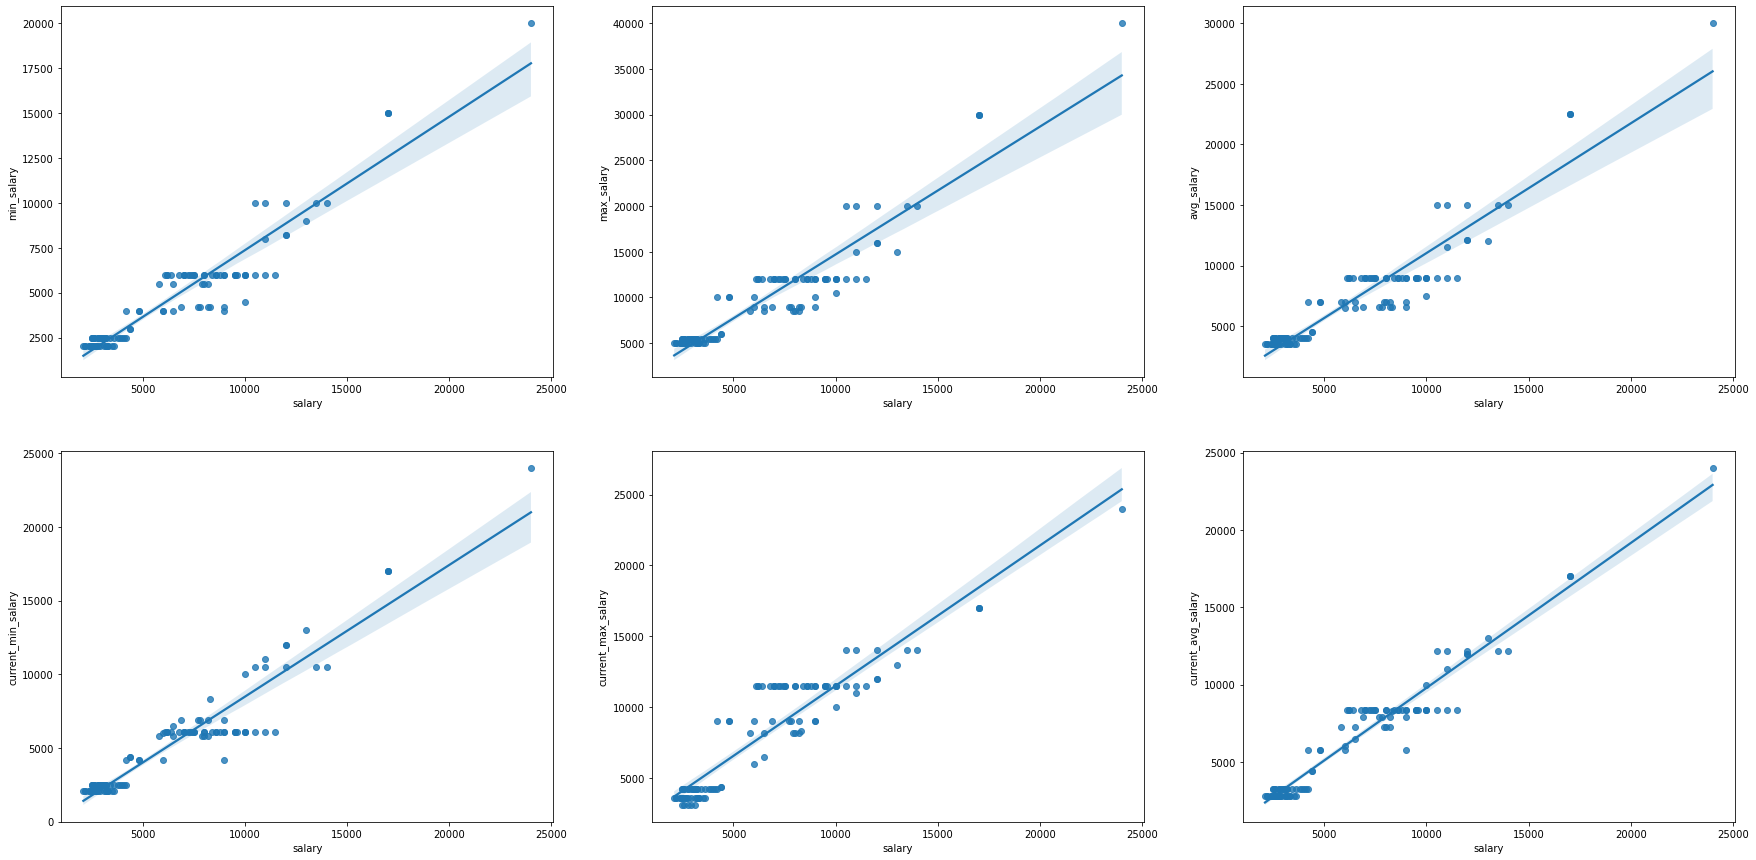

In [112]:
x = z['salary']
plt.figure(figsize=(30, 15))
plt.subplot(2, 3, 1)
sns.regplot(x=x, y=z['min_salary'])
plt.subplot(2, 3, 2)
sns.regplot(x=x, y=z['max_salary'])
plt.subplot(2, 3, 3)
sns.regplot(x=x, y=z['avg_salary'])
plt.subplot(2, 3, 4)
sns.regplot(x=x, y=z['current_min_salary'])
plt.subplot(2, 3, 5)
sns.regplot(x=x, y=z['current_max_salary'])
plt.subplot(2, 3, 6)
sns.regplot(x=x, y=z['current_avg_salary'])
plt.show()


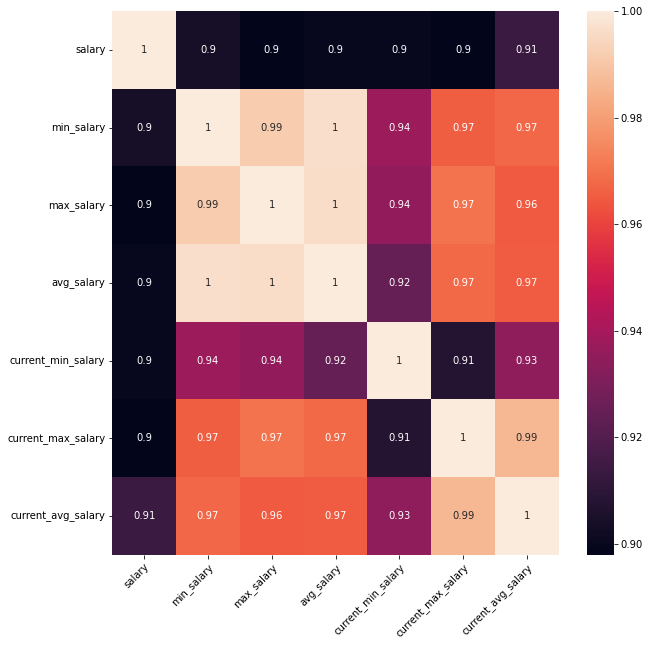

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(z[['salary', 'min_salary', 'max_salary',
            'avg_salary', 'current_min_salary', 'current_max_salary', 
            'current_avg_salary']].corr('spearman'), annot=True)
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

Di temukan bahwa ternyata semua data gaji karyawan dengan agregat berdasarkan gaji yang telah ditetapkan perusahaan dan gaji karyawan lainnya memiliki korelasi yang tinggi. Artinya, gaji pada setiap karyawan telah memenuhi standar gaji yang ditetapkan dan juga sama dengan karyawan lainnya.

## Uji Normalitas Pada Data Gaji Karyawan

In [114]:
from scipy.stats import shapiro

stat, pval = shapiro(raw_data['salary'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 0.05)')
    print ('Data Tidak Berdistribusi Normal')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 0.05)')
    print ('Data Berdistribusi Normal')

Tolak H0 Karena P-Value (3.985590879551637e-08 < 0.05)
DATA TIDAK BERDISTRIBUS NORMAL


## Perbandingan Median Besaran Gaji Karyawan pada Setiap Jabatan 
**Hypothesis:**  
- **H0:** Tidak ada perbedaan nilai median gaji karyawan pada setiap jabatan yang ada  
- **Ha:** Terdapat perbedaan nilai median gaji karyawan pada satu atau lebih jabatan yang ada

In [115]:
from scipy.stats import kruskal

stat, pval = kruskal(
    raw_data[raw_data['job_id'] == 'SA_REP']['salary'],
    raw_data[raw_data['job_id'] == 'ST_CLERK']['salary'],
    raw_data[raw_data['job_id'] == 'SH_CLERK']['salary'],
    raw_data[raw_data['job_id'] == 'SA_MAN']['salary'],
    raw_data[raw_data['job_id'] == 'IT_PROG']['salary'],
    raw_data[raw_data['job_id'] == 'FI_ACCOUNT']['salary'],
    raw_data[raw_data['job_id'] == 'PU_CLERK']['salary'],
    raw_data[raw_data['job_id'] == 'ST_MAN']['salary'],
    raw_data[raw_data['job_id'] == 'AD_VP']['salary'],
    raw_data[raw_data['job_id'] == 'AD_ASST']['salary'],
    raw_data[raw_data['job_id'] == 'MK_REP']['salary'],
    raw_data[raw_data['job_id'] == 'AC_MGR']['salary'],
    raw_data[raw_data['job_id'] == 'PR_REP']['salary'],
    raw_data[raw_data['job_id'] == 'HR_REP']['salary'],
    raw_data[raw_data['job_id'] == 'AD_PRES']['salary'],
    raw_data[raw_data['job_id'] == 'MK_MAN']['salary'],
    raw_data[raw_data['job_id'] == 'PU_MAN']['salary'],
    raw_data[raw_data['job_id'] == 'FI_MGR']['salary'],
    raw_data[raw_data['job_id'] == 'AC_ACCOUNT']['salary']
)

print('V-Statistic', stat)
print('P-Value', pval)


V-Statistic 94.9017649523658
P-Value 1.8830492885526735e-12


**Conclusion:** P-Value lebih rendah dari acuan tingkat signifikansi yang digunakan (0.05), yang berarti kita memiliki cukup bukti untuk menolak H0. Jadi, terdapat perbedaan nilai median gaji pada setiap jabatan yang ada.  
Hal ini juga dapat kita cek berdasarkan tabel dibawah

In [129]:
raw_data.groupby(['job_id']).median()['salary'].reset_index().rename(columns={'salary':'median salary'}).style.hide_index()

job_id,median salary
AC_ACCOUNT,8300.000000
AC_MGR,12000.000000
AD_ASST,4400.000000
AD_PRES,24000.000000
AD_VP,17000.000000
FI_ACCOUNT,7800.000000
FI_MGR,12000.000000
HR_REP,6500.000000
IT_PROG,4800.000000
MK_MAN,13000.000000


## Perbandingan Median Besaran Gaji di Setiap Cabang Berdasarkan Wilayah

**Hypothesis:**  
- **H0:** Median gaji karyawan di cabang Amerika = Median gaji karyawan di cabang Eropa  
- **Ha:** Median gaji karyawan di cabang Amerika < Median gaji karyawan di cabang Eropa

In [117]:
from scipy.stats import mannwhitneyu

stat, pval = mannwhitneyu(
    raw_data[raw_data['region_name'] == 'Americas\r']['salary'],
    raw_data[raw_data['region_name'] == 'Europe\r']['salary'],
    alternative = 'less' # Gaji di Amerika lebih tinggi dari di Eropa
) 

print('U-Statistic', stat)
print('P-Value', pval)

U-Statistic 449.5
P-Value 3.909530744179159e-09


**Conclusion:** P-Value lebih tinggi dari acuan tingkat siginifikansi yang digunakan (0.05), berarti kita memiliki cukup bukti untuk menolak H0, atau kita terima Ha, jadi nilai median gaji karyawan di Amerika lebih rendah dengan nilai median gaji karyawan di Eropa. Hal ini juga dapat kita lihat pada tabel dibawah

In [128]:
raw_data.groupby(['region_name']).median()['salary'].reset_index().rename(columns={'salary':'avg salary'}).style.hide_index()

region_name,avg salary
Americas,3350.000000
Europe,8700.000000
